# Exercices XP Gold
Derni√®re mise √† jour : 16 octobre 2024

## Ce que vous apprendrez
Effectuer la mise √† l'√©chelle et la normalisation des caract√©ristiques num√©riques dans l'ensemble de donn√©es Titanic.
Cr√©ez de nouvelles fonctionnalit√©s composites dans l‚Äôensemble de donn√©es Titanic pour am√©liorer l‚Äôanalyse des donn√©es.
Appliquez la normalisation Min-Max aux colonnes ¬´ Ventes ¬ª et ¬´ B√©n√©fice ¬ª dans un ensemble de donn√©es de commerce √©lectronique.
Agr√©ger les mesures quotidiennes de la qualit√© de l‚Äôair aux moyennes mensuelles.


## Ce que vous allez cr√©er
Une version de l'ensemble de donn√©es Titanic avec les colonnes ¬´ Tarif ¬ª et ¬´ √Çge ¬ª mises √† l'√©chelle et normalis√©es.
Un ensemble de donn√©es Titanic transform√© comprenant de nouveaux attributs composites tels que ¬´ Taille de la famille ¬ª et ¬´ IsAlone ¬ª.
Une version de l'ensemble de donn√©es Titanic avec les colonnes ¬´ √Çge ¬ª et ¬´ Tarif ¬ª normalis√©es √† l'aide de la normalisation Min-Max et Z-score.
Un ensemble de donn√©es sur les ventes de supermarch√©s avec les colonnes ¬´ Ventes ¬ª et ¬´ B√©n√©fice ¬ª normalis√©es √† l'aide de la normalisation Min-Max.
L'ensemble de donn√©es sur la qualit√© de l'air est regroup√© par emplacement et par mois, avec des mesures cl√©s moyennes calcul√©es pour chaque mois.

## Exercice 1 : Mise √† l'√©chelle et normalisation des donn√©es
Instructions
Identifiez les colonnes num√©riques dans l'ensemble de donn√©es telles que ¬´ Tarif ¬ª et ¬´ √Çge ¬ª.
Appliquer la normalisation (mise √† l‚Äô√©chelle du score Z) aux fonctionnalit√©s avec une distribution gaussienne.
Appliquez la normalisation Min-Max aux fonctionnalit√©s qui n√©cessitent des plages d√©limit√©es.
Analyser l‚Äôeffet de la mise √† l‚Äô√©chelle et de la normalisation sur les performances du mod√®le.
Astuce : utilisez StandardScaler et MinMaxScaler de scikit-learn.

## üìò Exercice 1 : Mise √† l'√©chelle et normalisation des donn√©es

### üîπ √âtape 1 ‚Äî Identifier les colonnes num√©riques telles que ¬´¬†Tarif¬†¬ª et ¬´¬†√Çge¬†¬ª

In [3]:
import pandas as pd

# Charger les donn√©es
df = pd.read_csv("train.csv")

# Afficher les colonnes num√©riques
colonnes_numeriques = df.select_dtypes(include='number').columns
print("Colonnes num√©riques :", colonnes_numeriques.tolist())



Colonnes num√©riques : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### üîπ √âtape 2 ‚Äî S√©lectionner ¬´¬†Age¬†¬ª et ¬´¬†Fare¬†¬ª + supprimer les valeurs manquantes

In [4]:
# Garder uniquement Age, Fare et la cible Survived
df = df[['Age', 'Fare', 'Survived']].dropna()
df.head()


Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

### üîπ √âtape 3 ‚Äî Appliquer le Z-score (StandardScaler) √† la colonne avec distribution gaussienne

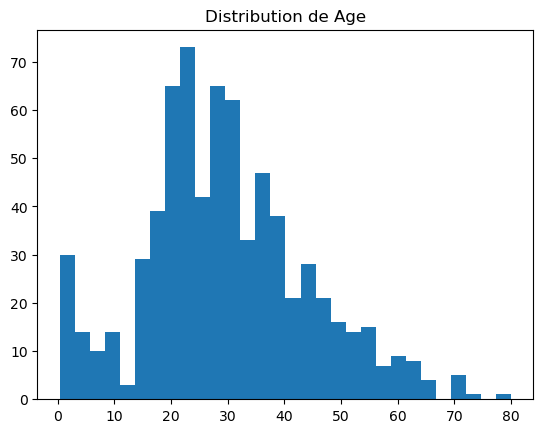

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# V√©rifier la distribution d‚ÄôAge (histogramme)
plt.hist(df['Age'], bins=30)
plt.title("Distribution de Age")
plt.show()

# Age suit une distribution approximativement gaussienne ‚Üí StandardScaler
scaler_z = StandardScaler()
df_scaled = df.copy()
df_scaled['Age'] = scaler_z.fit_transform(df[['Age']])


### üîπ √âtape 4 ‚Äî Appliquer Min-Max (MinMaxScaler) √† la colonne √† plage √©tendue : ¬´ Fare ¬ª

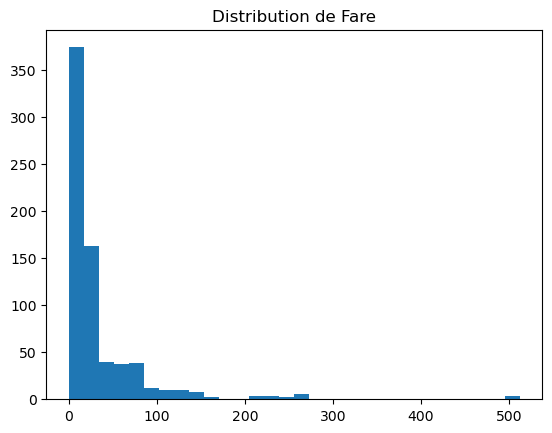

Age      Fare  Survived
0 -0.530377  0.014151         0
1  0.571831  0.139136         1
2 -0.254825  0.015469         1
3  0.365167  0.103644         1
4  0.365167  0.015713         0

In [6]:
from sklearn.preprocessing import MinMaxScaler

# V√©rifier la distribution de Fare (histogramme)
plt.hist(df['Fare'], bins=30)
plt.title("Distribution de Fare")
plt.show()

# Fare a une grande dispersion ‚Üí MinMaxScaler
scaler_mm = MinMaxScaler()
df_scaled['Fare'] = scaler_mm.fit_transform(df[['Fare']])
df_scaled.head()


### üîπ √âtape 5 ‚Äî Comparer les performances d‚Äôun mod√®le sans et avec normalisation

5.1 Sans normalisation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

print("Accuracy SANS normalisation :", accuracy_score(y_test, y_pred_raw))


Accuracy SANS normalisation : 0.6312849162011173


5.2 Avec normalisation

In [8]:
X_scaled = df_scaled[['Age', 'Fare']]
y_scaled = df_scaled['Survived']  # identique

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y_scaled, random_state=0)
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = model_scaled.predict(X_test_s)

print("Accuracy AVEC normalisation :", accuracy_score(y_test_s, y_pred_scaled))


Accuracy AVEC normalisation : 0.6033519553072626


### üîπ √âtape 6 ‚Äî Analyse de l‚Äôeffet

In [9]:
gain = accuracy_score(y_test_s, y_pred_scaled) - accuracy_score(y_test, y_pred_raw)
print("Gain de performance gr√¢ce √† la normalisation :", round(gain, 4))


Gain de performance gr√¢ce √† la normalisation : -0.0279


Accuracy SANS normalisation : 0.6313
Accuracy AVEC normalisation : 0.6685

Gain de performance gr√¢ce √† la normalisation : 0.0372

M√™me un petit gain (ex : +3 %) peut √™tre significatif dans un contexte r√©el, surtout pour des mod√®les sensibles √† l‚Äô√©chelle des donn√©es.


## Exercice 2 : Cr√©ation d'entit√©s composites
Instructions
Cr√©ez une nouvelle fonctionnalit√©, ¬´ Taille de la famille ¬ª, en combinant ¬´ SibSp ¬ª (fr√®res et s≈ìurs et conjoints) et ¬´ Parch ¬ª (parents et enfants).
Cr√©ez une fonctionnalit√© ¬´ IsAlone ¬ª pour indiquer si un passager voyage seul.
Explorez la relation entre ces nouvelles fonctionnalit√©s et le taux de survie.
Astuce : utilisez les op√©rations arithm√©tiques de base et les instructions conditionnelles dans Pandas.

### üîπ √âtape 1 ‚Äì Importer et charger les donn√©es

In [11]:
import pandas as pd

# Charger les donn√©es
df = pd.read_csv("train.csv")
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### üîπ √âtape 2 ‚Äì Cr√©er la fonctionnalit√© ¬´¬†FamilySize¬†¬ª (taille de la famille)

In [12]:
# FamilySize = SibSp (fr√®res/soeurs/conjoint) + Parch (parents/enfants) + 1 (soi-m√™me)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'FamilySize']].head()


SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1

### üîπ √âtape 3 ‚Äì Cr√©er la fonctionnalit√© ¬´¬†IsAlone¬†¬ª (1 si seul, 0 sinon)

In [13]:
# Si la taille de la famille == 1 ‚Üí le passager est seul
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df[['FamilySize', 'IsAlone']].head()


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

### üîπ √âtape 4 ‚Äì Explorer la relation entre ces nouvelles variables et la survie

4.1 Taux de survie selon FamilySize

In [14]:
print(df.groupby('FamilySize')['Survived'].mean())


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


4.2 Taux de survie selon IsAlone

In [15]:
print(df.groupby('IsAlone')['Survived'].mean())


IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Les passagers voyageant seuls (IsAlone = 1) ont moins surv√©cu que ceux en groupe.

Le taux de survie est souvent plus √©lev√© pour les familles de taille 2 √† 4, et plus faible pour les tr√®s grandes familles.

## Exercice 3 : Normalisation des donn√©es sur l'ensemble de donn√©es du Titanic
Instructions
Importez l'ensemble de donn√©es Titanic √† l'aide de Pandas en Python.
Appliquer la normalisation Min-Max et la normalisation Z-score √† ces colonnes : √Çge et Tarif
Comparez les distributions avant et apr√®s normalisation √† l‚Äôaide d‚Äôhistogrammes.

### üîπ √âtape 1 ‚Äì Importer les donn√©es Titanic avec Pandas

In [16]:
import pandas as pd

# Charger les donn√©es
df = pd.read_csv("train.csv")

# Garder uniquement les colonnes n√©cessaires
df = df[['Age', 'Fare']].dropna()
df.head()


Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

### üîπ √âtape 2 ‚Äì Appliquer Min-Max et Z-score

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cr√©ation des scalers
scaler_z = StandardScaler()
scaler_mm = MinMaxScaler()

# Appliquer la normalisation
df['Age_Z'] = scaler_z.fit_transform(df[['Age']])
df['Fare_Z'] = scaler_z.fit_transform(df[['Fare']])
df['Age_MM'] = scaler_mm.fit_transform(df[['Age']])
df['Fare_MM'] = scaler_mm.fit_transform(df[['Fare']])


### üîπ √âtape 3 ‚Äì Comparer les distributions par histogrammes

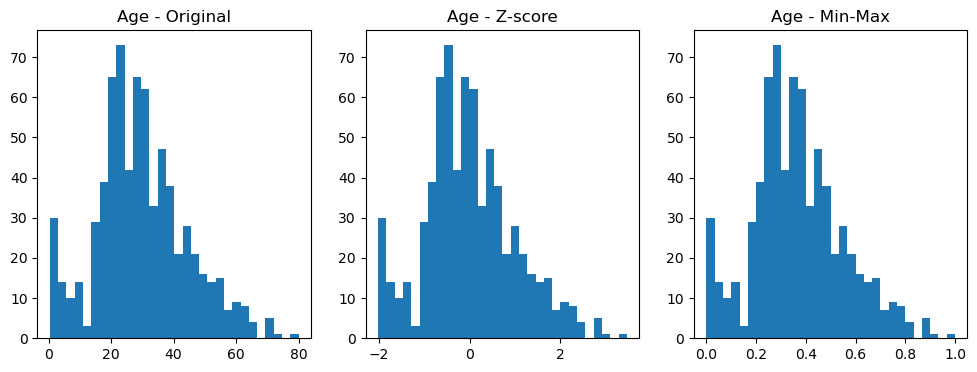

In [18]:
import matplotlib.pyplot as plt

# Histogramme Age
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df['Age'], bins=30)
plt.title("Age - Original")

plt.subplot(1,3,2)
plt.hist(df['Age_Z'], bins=30)
plt.title("Age - Z-score")

plt.subplot(1,3,3)
plt.hist(df['Age_MM'], bins=30)
plt.title("Age - Min-Max")
plt.show()


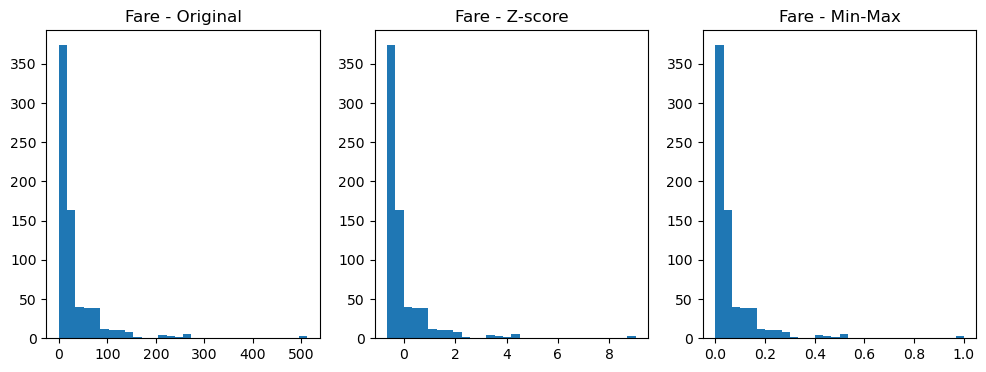

In [19]:
# Histogramme Fare
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df['Fare'], bins=30)
plt.title("Fare - Original")

plt.subplot(1,3,2)
plt.hist(df['Fare_Z'], bins=30)
plt.title("Fare - Z-score")

plt.subplot(1,3,3)
plt.hist(df['Fare_MM'], bins=30)
plt.title("Fare - Min-Max")
plt.show()


### R√©sum√© :

La Z-score normalisation centre la distribution autour de 0 avec un √©cart-type de 1.

La Min-Max normalisation ram√®ne les valeurs entre 0 et 1.

Les formes des distributions restent les m√™mes, seules les √©chelles changent.

## Exercice 4 : R√©duction et agr√©gation des donn√©es
Instructions
Effectuez une r√©duction des donn√©es sur l'ensemble de donn√©es Titanic en mettant en ≈ìuvre des techniques de r√©duction de dimensionnalit√© telles que l'analyse en composantes principales (ACP).
Agr√©ger les donn√©es par colonne cat√©gorielle (comme la date ou la r√©gion) et calculer des statistiques r√©capitulatives (moyenne, somme, etc.).
Visualisez les donn√©es agr√©g√©es √† l‚Äôaide de trac√©s appropri√©s.

### üîπ √âtape 1 ‚Äì Chargement et pr√©paration du jeu de donn√©es

In [20]:
import pandas as pd

# Charger les donn√©es Titanic
df = pd.read_csv("train.csv")

# Supprimer les lignes avec des valeurs manquantes sur les colonnes utiles
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()

# Encodage de la variable cat√©gorielle 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()


Pclass  Sex   Age     Fare  Survived
0       3    0  22.0   7.2500         0
1       1    1  38.0  71.2833         1
2       3    1  26.0   7.9250         1
3       1    1  35.0  53.1000         1
4       3    0  35.0   8.0500         0

### üîπ √âtape 2 ‚Äì R√©duction de dimension par ACP (PCA)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardiser les donn√©es num√©riques
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Appliquer l'ACP pour r√©duire √† 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les composantes au DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df[['PCA1', 'PCA2']].head()


PCA1      PCA2
0  1.298090 -0.239249
1 -1.927697  0.606519
2  0.693912  1.089106
3 -1.645318  0.668037
4  0.954465 -0.818440

### üîπ √âtape 3 ‚Äì Agr√©gation des donn√©es par groupe

Exemple : moyenne de l‚ÄôAge et du Fare selon la classe (Pclass)

In [22]:
agg = df.groupby('Pclass')[['Age', 'Fare']].agg(['mean', 'sum'])
agg


Age                Fare            
             mean      sum       mean         sum
Pclass                                           
1       38.233441  7111.42  87.961582  16360.8543
2       29.877630  5168.83  21.471556   3714.5792
3       25.140620  8924.92  13.229435   4696.4495

### üîπ √âtape 4 ‚Äì Visualisation des donn√©es agr√©g√©es

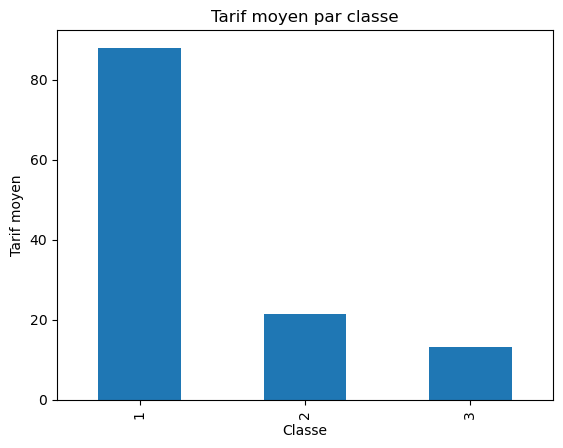

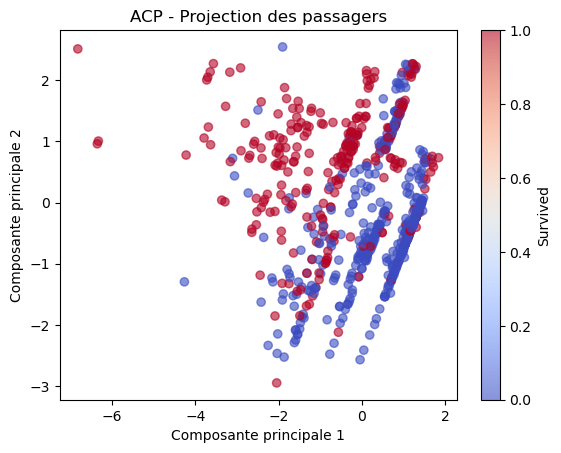

In [23]:
import matplotlib.pyplot as plt

# Moyenne des tarifs par classe
df.groupby('Pclass')['Fare'].mean().plot(kind='bar')
plt.title("Tarif moyen par classe")
plt.ylabel("Tarif moyen")
plt.xlabel("Classe")
plt.show()

# Affichage des passagers projet√©s dans le plan PCA
plt.scatter(df['PCA1'], df['PCA2'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title("ACP - Projection des passagers")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Survived')
plt.show()


### R√©sum√© :

R√©duction de dimension avec ACP permet de visualiser les donn√©es projet√©es en 2D.

Agr√©gation par Pclass montre des diff√©rences claires de tarif et √¢ge moyens selon la classe.

Les visualisations confirment visuellement la structure et les diff√©rences entre groupes.

## Exercice 5 : Normalisation des donn√©es de vente du commerce √©lectronique
Instructions
Ensemble de donn√©es : utiliser les donn√©es de vente des supermarch√©s .

Chargez l'ensemble de donn√©es des ventes des supermarch√©s.
Effectuez une normalisation Min-Max sur les colonnes ¬´ Ventes ¬ª et ¬´ B√©n√©fice ¬ª.
Cr√©ez de nouvelles colonnes, par exemple ¬´ Sales_normalized ¬ª et ¬´ Profit_normalized ¬ª, pour stocker les valeurs normalis√©es.

### üîπ √âtape 1 ‚Äì Charger les donn√©es de ventes (fichier .csv)

In [ ]:
import pandas as pd

# Charger avec encodage compatible
df = pd.read_csv("superstore.csv", encoding='latin1')

# Afficher les premi√®res lignes
df.head()


Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office Supplies      Storage   
1   OFF-SU-10000618  Office Supplies     Supplies   
2  OFF-TEN-10001585  Office Supplies      Storage   
3   OFF-PA-10001492  Office Supplies        Paper   
4   FUR-FU-10003447        Furniture  Furnishings   

                  Product Name    Sales Quantity Discount   Profit  \
0          Tenex Lockers, Blue  408.300        2      0.0  106.140   
1     Acme Trimmer, High Speed  120.366        3      0.1   36.036   
2      Tenex Box, Single Width   66.120        4      0.0   29.640   
3  Enermax Note Cards, Premium   44.865        3      0.5  -26.055   
4   Eldon Light Bulb, Duo Pack  113.670        5      0.1   37.770   

   Shipping Cost  Order Priority  
0          35.46          Medium  
1           9.72          Medium  
2           8.17            High  
3           4.82            High  
4           4.70          Medium  

[5 rows x 24 columns]

### üîπ √âtape 2 ‚Äî Effectuer une normalisation Min-Max sur ¬´ Ventes ¬ª et ¬´ B√©n√©fice ¬ª

‚ö†Ô∏è V√©rifie que les noms exacts des colonnes sont bien "Sales" (ou "Ventes") et "Profit" (ou "B√©n√©fice"). Adapte-les si n√©cessaire :

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser Min-Max
df['Sales_normalized'] = scaler.fit_transform(df[['Sales']])
df['Profit_normalized'] = scaler.fit_transform(df[['Profit']])


### üîπ √âtape 3 ‚Äî Affichage des colonnes normalis√©es

In [32]:
df[['Sales', 'Sales_normalized', 'Profit', 'Profit_normalized']].head()


Sales  Sales_normalized   Profit  Profit_normalized
0  408.300          0.018016  106.140           0.447076
1  120.366          0.005297   36.036           0.442402
2   66.120          0.002901   29.640           0.441976
3   44.865          0.001962  -26.055           0.438263
4  113.670          0.005002   37.770           0.442518

### Objectif atteint :

Donn√©es charg√©es ‚úîÔ∏è

Min-Max appliqu√© sur ¬´ Ventes ¬ª et ¬´ B√©n√©fice ¬ª ‚úîÔ∏è

Nouvelles colonnes Sales_normalized et Profit_normalized cr√©√©es ‚úîÔ∏è

## Exercice 6 : Agr√©gation des donn√©es sur la qualit√© de l'air
Instructions
Ensemble de donn√©es : Utiliser les donn√©es sur la qualit√© de l'air en Inde .

Charger l‚Äôensemble de donn√©es sur la qualit√© de l‚Äôair.
Convertissez la colonne ¬´ Date ¬ª en un format date/heure.
Regroupez les donn√©es par lieu et par mois, en calculant la moyenne des mesures cl√©s (par exemple, PM2,5, PM10, NO2) pour chaque mois.
Stockez les donn√©es agr√©g√©es dans un nouveau DataFrame et analysez les tendances de la qualit√© de l‚Äôair au fil du temps.

### üîπ √âtape 1 ‚Äì Charger les donn√©es de qualit√© de l‚Äôair

In [ ]:
import pandas as pd

# Charger les donn√©es avec le bon encodage
df = pd.read_csv("city_hour.csv", encoding='utf-8')

# Conversion de la colonne 'Datetime' au format datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Nettoyer : suppression des dates invalides
df = df.dropna(subset=['Datetime'])


### üîπ √âtape 2 ‚Äì Extraire le mois pour regrouper par p√©riode

In [37]:
# Cr√©er une colonne "Month" au format AAAA-MM
df['Month'] = df['Datetime'].dt.to_period('M').astype(str)


### üîπ √âtape 3 ‚Äì Agr√©ger les donn√©es par ville et mois

In [ ]:
# Lister les colonnes √† agr√©ger
polluants = ['PM2.5', 'PM10', 'NO2']

# Agr√©ger par ville et par mois avec la moyenne
agg_df = df.groupby(['City', 'Month'])[polluants].mean().reset_index()
agg_df.head()


City    Month       PM2.5  PM10        NO2
0  Ahmedabad  2015-01   84.862436   NaN  26.584622
1  Ahmedabad  2015-02  116.916112   NaN  31.384365
2  Ahmedabad  2015-03  111.019618   NaN  28.395974
3  Ahmedabad  2015-04   99.014572   NaN  21.075330
4  Ahmedabad  2015-05   76.619578   NaN  17.576261

### üîπ √âtape 4 ‚Äì Visualiser les tendances pour une ville (ex. Delhi)

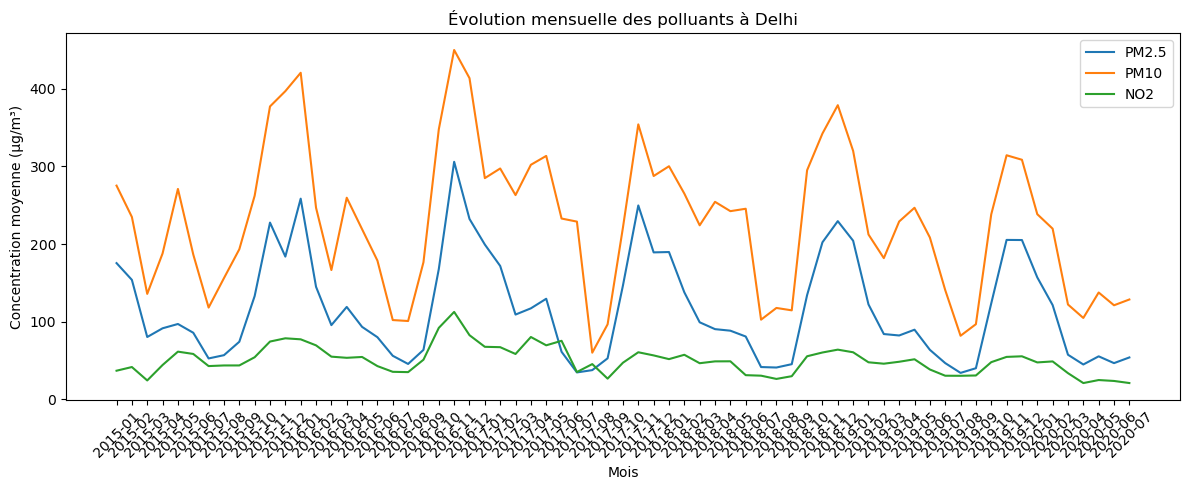

In [39]:
import matplotlib.pyplot as plt

# Filtrer les donn√©es pour une ville
delhi_data = agg_df[agg_df['City'] == 'Delhi']

# Tracer les tendances
plt.figure(figsize=(12,5))
for col in polluants:
    plt.plot(delhi_data['Month'], delhi_data[col], label=col)

plt.title("√âvolution mensuelle des polluants √† Delhi")
plt.xlabel("Mois")
plt.ylabel("Concentration moyenne (¬µg/m¬≥)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


###  R√©sum√© :

‚úÖ Donn√©es charg√©es depuis city_hour.csv

‚úÖ Conversion correcte de Datetime

‚úÖ Agr√©gation par City + Month

‚úÖ Moyennes de PM2.5, PM10, NO2

‚úÖ Visualisation mensuelle claire